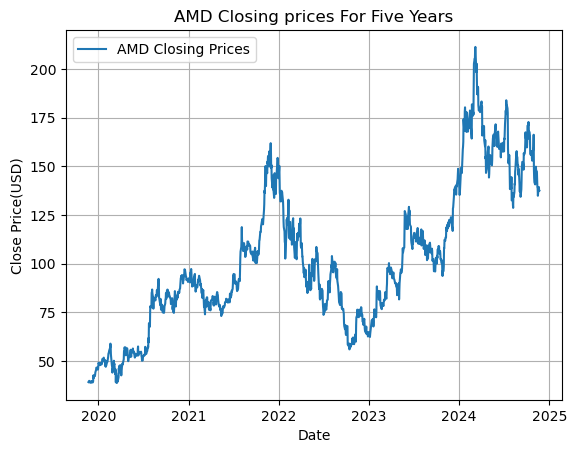

In [3]:
#Visual of Data


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 


#Fetch Data 
ticker = yf.Ticker('AMD')
dfAMD = ticker.history(period='5y')

dates = dfAMD.index.to_numpy()
closing_prices = dfAMD['Close'].to_numpy()

plt.plot(dates, closing_prices, label='AMD Closing Prices')
plt.title('AMD Closing prices For Five Years')
plt.xlabel('Date')
plt.ylabel('Close Price(USD)')
plt.grid(True)
plt.legend()
plt.show()



In [4]:
# Check for Stationary Uisng ADF Test 
from statsmodels.tsa.stattools import adfuller

result = adfuller(dfAMD['Close'])

adf_statistic= result[0]
p_value = result[1]
critical_values = result[4]

print (f'ADF Statistic: {adf_statistic}')
print (f'p-value: {p_value}')
print ('\nCritical Values:')
for key, value in critical_values.items():
    print(f' {key}:{value}')


if result[1]<0.05:
    print("Data is Stationary")
else:
    print("Not Stationary")


    
#p-Value is greater than 0.05 we have to diiference it





ADF Statistic: -1.9552167031470318
p-value: 0.3065473920978382

Critical Values:
 1%:-3.4355629707955395
 5%:-2.863842063387667
 10%:-2.567995644141416
Not Stationary


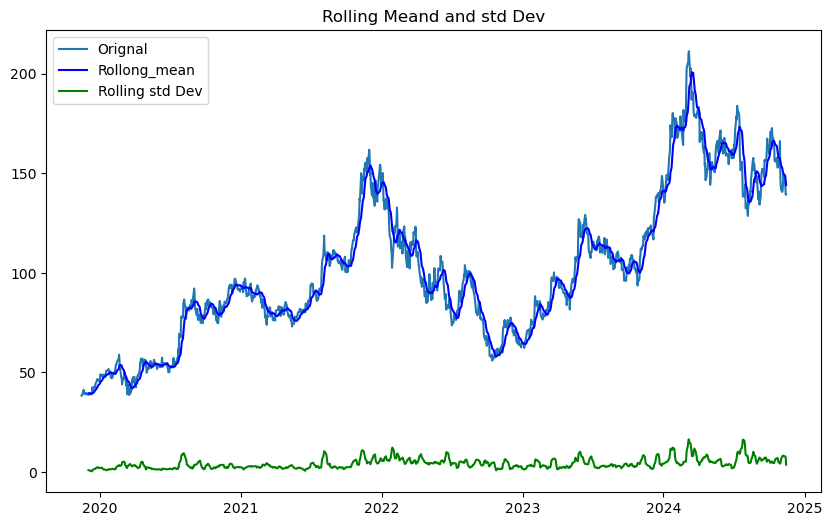

In [28]:
#visual inspection to check stationary 
#using Rolling mean & rolling standard deviation (data will not be constant with high & lows) 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
ticker= yf.Ticker('AMD')
dfAMD= ticker.history(period='5y')
rolling_mean = dfAMD['Close'].rolling(window=30).mean()
rolling_std = dfAMD['Close'].rolling(window =30).std()

plt.figure(figsize=(10,6))
plt.plot(dfAMD['Close'], label='Original Data')
plt.plot(rolling_mean, label='Rolling_mean', color='blue')
plt.plot(rolling_std, label='Rolling std Dev', color='green')
plt.legend()
plt.title("Rolling Mean and std Dev")
plt.show()


           

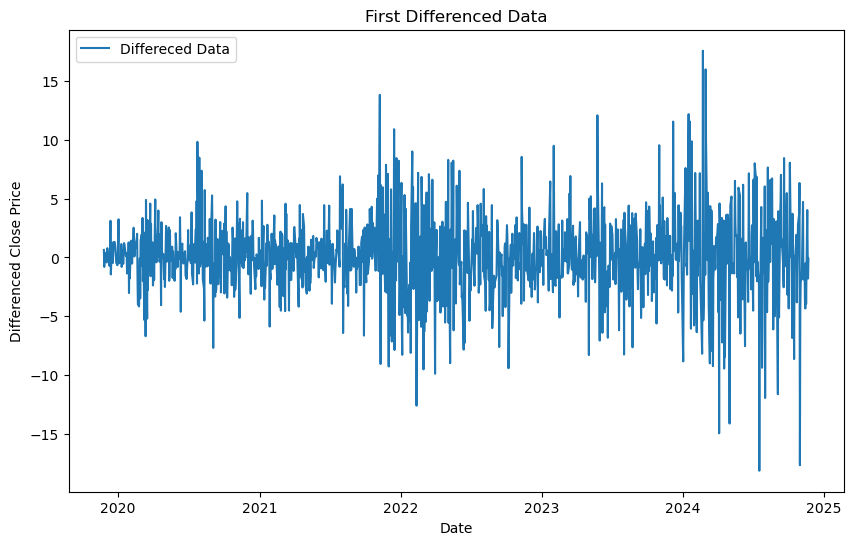

ADF Statistic: -36.57774523761858
p-value: 0.0
Critical Values:
1%: -3.4355671297788666
5%: -2.8638438984080117
10%: -2.5679966213893057
Data is Stationary
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6682.219, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6679.309, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6679.992, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6679.976, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6677.958, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6681.957, Time=0.63 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.181 seconds
Auto ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3337.979
Date:                Thu, 21 Nov 2024   AIC                      

In [5]:
#visual inspection to check stationary 
#using Rolling mean & rolling standard deviation (data will not be constant with high & lows) 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

ticker= yf.Ticker('AMD')
dfAMD= ticker.history(period='5y')

#first Differencing
dfAMD['diff'] = dfAMD['Close'].diff()

plt.figure(figsize=(10,6))
plt.plot(dfAMD['diff'], label='Differeced Data')
plt.title('First Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()

#ADF Test
adf_result_diff = adfuller(dfAMD['diff'].dropna())

print(f'ADF Statistic: {adf_result_diff[0]}')
print(f'p-value: {adf_result_diff[1]}')
print("Critical Values:")
for key, value in adf_result_diff[4].items():
    print(f"{key}: {value}")

if adf_result_diff[1] <0.05:
    print("Data is Stationary")
else:
    print("Data is not Stationary")

auto_model = pm.auto_arima(dfAMD['Close'],
                           seasonal= False,
                           trace=True,
                           stepwise=True)

print("Auto ARIMA Model Summary:")
print(auto_model.summary())



           

In [1]:
from statsmodel.tsa.stattols import adfuller
adf_result_diff = adfuller(dfAMD['diff'].dropna())

print(f'ADF Statistic: {adf_result_diff[0]}')
print(f'p-value: {adf_result_diff[1]}')
print(f'Critical Values: {adf_result_diff[4]}')

if adf_result_diff[1]<0.05:
    print("Data is Stationary")
else:
    print("Data is not stationary")
automodel = pm.auto_arism(dfAMD['diff']dropna(), seasonal= False, trace=True, stepwise=True)
print("Auto Arima Model Summary:")
print(auto_model.summary())


SyntaxError: invalid syntax. Perhaps you forgot a comma? (748497163.py, line 12)